### Part 1: Sentiment Analysis with Twitter

In order to fetch tweets through tweepy (http://docs.tweepy.org/en/v3.5.0/api.html) Twitter API, one needs to register an App through their twitter account. Follow the following steps:

   - Sign up a Twitter account: https://apps.twitter.com/app/new.
   - Go to: https://developer.twitter.com/en/apps to create a new App.
   - Go to mange key and access token of the App page.
   - Open the ‘Keys and Access Tokens’ tab.
   - Copy ‘Consumer Key’, ‘Consumer Secret’, ‘Access token’ and ‘Access Token Secret’.


- You need to install <b>textblog</b>. Use pip: ```pip install textblob```
- You need to install <b>tweepy</b>. Use pip: ```pip install tweepy```

In [1]:
!pip install textblob
!pip install tweepy

In [1]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
import matplotlib.pyplot as plt

## Twitter credentials
consumer_key = "fM4do4wnn7bwvT11uRt7Fg"
consumer_secret = "3jZ4A2L85t6AeYb2arVWCPKx90kR5K4SGhjRFWymQ"
access_token = "331555799-B1rdlBw0cWxexLQuq0lxsKvz64DdqXJcklQ3Zkks"
access_token_secret = "wzcHT2ORj4AgK7QiXljO3UP7lz5f1IeY2M46xgkseoqqH"

## set up an instance of Tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [2]:
def classify(tweet):
    clean_tweet=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    # create TextBlob object of passed tweet text
    analysis = TextBlob(clean_tweet)
    # set sentiment
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

def get_sentiments(fetched_tweets):
    # empty list to store parsed tweets
    tweets = []
    # parsing tweets one by one
    for tweet in fetched_tweets:
        # empty dictionary to store required params of a tweet
        parsed_tweet = {}
        #print(tweet.text)
        # saving text of tweet
        parsed_tweet['text'] = tweet.text
        # saving sentiment of tweet
        parsed_tweet['sentiment'] = classify(tweet.text)
 
        # appending parsed tweet to tweets list
        if tweet.retweet_count > 0:
            # if tweet has retweets, ensure that it is appended only once
            if parsed_tweet not in tweets:
                tweets.append(parsed_tweet)
        else:
            tweets.append(parsed_tweet)
 
    # return parsed tweets
    return tweets

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

def summary(tweets, n):
    # picking positive tweets from tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    # percentage of positive tweets
    ptweet_size=100*len(ptweets)/len(tweets)
    print("Positive tweets percentage: {} %".format(ptweet_size))
    # picking negative tweets from tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    # percentage of negative tweets
    ntweet_size=100*len(ntweets)/len(tweets)
    print("Negative tweets percentage: {} %".format(ntweet_size))
    # percentage of neutral tweets
    neutral=len(tweets) - len(ntweets) - len(ptweets)
    neutral_size=100*neutral/len(tweets)
    print("Neutral tweets percentage: {} %".format(neutral_size))
 
    # Data to plot
    labels = 'Positive', 'Negative', 'Neutral'
    sizes = [ptweet_size, ntweet_size, neutral_size]
    colors = ['gold', 'red', 'lightskyblue']
    explode = (0.1, 0, 0)  # explode 1st slice
 
    # Plot
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
    plt.axis('equal')
    plt.show()
    
    
    # printing first n positive tweets
    print("\n\nPositive tweets:")
    for tweet in ptweets[:n]:
        print(tweet['text'])
 
    # printing first n negative tweets
    print("\n\nNegative tweets:")
    for tweet in ntweets[:n]:
        print(tweet['text'])

Positive tweets percentage: 51.25 %
Negative tweets percentage: 8.75 %
Neutral tweets percentage: 40.0 %


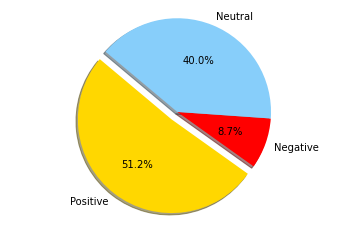



Positive tweets:
RT @IFRCAsiaPacific: In #Nepal, as millions of people cope with a huge wave of #COVID19, an earthquake struck in remote mountains in the no…
RT @sarahkbingler: #Ontario (and Canada) must recognize that many people who survived #covid19 will need #rehabilitation to recover functio…
RT @LawrenceSellin: Dr. Li-Meng YAN @DrLiMengYAN1 is correct. Shibo Jiang and Shuwen Liu are important to the origin of #COVID19 
Among oth…
May 21, 2021. #COVID19 New deaths reported by region. https://t.co/yqVoo57byw  @Reuters https://t.co/fLswBlB6Hp
RT @BogochIsaac: 183,399 #COVID19 vaccines were administered in Ontario, as of 8pm today.

You read that right...&gt;183K, the most vaccines a…
RT @KhushnumaKashm1: Despite the tremendous efforts by the administration, to control the spread of #COVID19 pandemic and sustained campaig…
RT @SusanSchutte2: Paulette Durette, 47, New York City Test &amp; Trace Public health advisor, beloved wife, mother 4, including a special need…
RT @pnppio: ELEA

In [4]:
#Classify the sentiments for hashtag Covid19
raw_tweets = api.search(q = 'Covid19', lang='en',count = 400)
classified_tweets=get_sentiments(raw_tweets)
summary(classified_tweets,10)

Positive tweets percentage: 51.5 %
Negative tweets percentage: 13.0 %
Neutral tweets percentage: 35.5 %


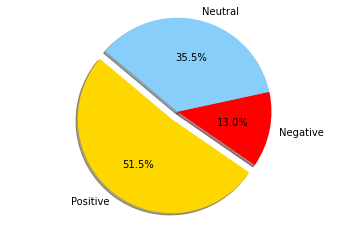



Positive tweets:
Been in the studio all day recording the next one - it’s really so amazing what you all have done here. 🙏🙏🙏 https://t.co/rxa5njMn0z
I wanted to say thank you to you so today I will be addressing a very pressing issue. 🐈🐈‍⬛❓ https://t.co/kBUybYoV2W
WELL WELL WELL you all really went out and left my greatest expectations in shambles this week.😆 Word on the street… https://t.co/2gL6zt2IH6
RT @pandoramusic: .@taylorswift13 dives into tracks from her newly re-recorded classic, 'Fearless (Taylor's Version),' on Pop Soundbites Mo…
RT @youtubemusic: *Cries in Fearless* “Taylor’s Version” is here and now we can relive @taylorswift13’s sophomore album like it’s the first…
This is more than perfectly fine 😄 @amazonmusic https://t.co/buTDyt52RX https://t.co/BSn7TGH3Ts
You ok? NO cause I sent my two kids @Olivia_Rodrigo and @conangray my new version of You Belong With Me and THEY AR… https://t.co/6OZ0ZDec24
Me in 2020: life is chill, writing songs based in fiction to avoid drama,

In [5]:
# #Classify the sentiments for user @taylorswift13
tweets = api.user_timeline(id = '@taylorswift13', lang='en',count = 250)
parsed_tweets=get_sentiments(tweets)
summary(parsed_tweets,10)

###  <font color='red'> Task 11 (Question 1): (3%)

- Compare the sentiments on Twitter by brands on a particular product type.
- You need to determine the proper hashtag in order to perform the sentiment analysis
- Example 1: #iPhone12Pro vs. #samsunggalaxyS21 
- Example 2: #Toyata vs. #Honda
- Example 3: #macbookpro vs #LenovoThinkPad
- Create a brief report for the sentiment analysis (% of positive, negative and neutral tweets, and graphs)
- Comment on the results obtained. 

Positive tweets percentage: 64.93506493506493 %
Negative tweets percentage: 1.2987012987012987 %
Neutral tweets percentage: 33.76623376623377 %


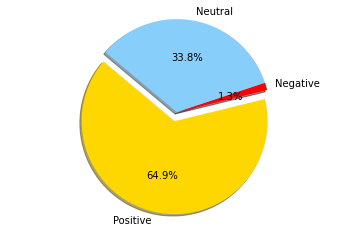



Positive tweets:
RT @TaraShalton: Check out this new iphone 12 case that I uploaded to https://t.co/UyjjEG7MPX! https://t.co/S8TM5SiDlF #woman #art #face #e…
RT @Almanz_art: Get my art printed on awesome products. Support me at Redbubble #RBandME:  https://t.co/5i8rkDVp5U #findyourthing #redbubbl…
RT @TechyPreacher: iPhone 13 Pro 
in the new exclusive color designed specifically for iPhone 13 Pro series.

Via👇
@ LeaksApplePro 

#apple…
iPhone 13 Pro 
in the new exclusive color designed specifically for iPhone 13 Pro series.

Via👇
@ LeaksApplePro… https://t.co/6h6Oy1HISo
@ADIBTweets A) True
Liked Followed Tagged Done
@huka_tsm 
@Roshy_7

#AbuDhabiIslamicBank  
#competition… https://t.co/4B2kSRW8ib
@ADIBTweets A) True
Liked Followed Tagged Done
@huka_tsm 
@Roshy_7

#AbuDhabiIslamicBank  
#competition… https://t.co/CXNoTqZom7
@ADIBTweets A) True
Liked Followed Tagged Done
@huka_tsm 
@Roshy_7

#AbuDhabiIslamicBank  
#competition… https://t.co/uazfTAnCYh
@ADIBTweets A) True
Liked Followed

In [6]:
#Classify the sentiments for hashtag iPhone12Pro
raw_tweets = api.search(q = 'iPhone12Pro', lang='en',count = 400)
classified_tweets=get_sentiments(raw_tweets)
summary(classified_tweets,10)

Positive tweets percentage: 43.24324324324324 %
Negative tweets percentage: 10.81081081081081 %
Neutral tweets percentage: 45.945945945945944 %


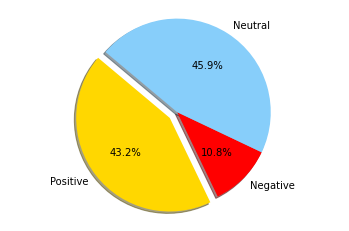



Positive tweets:
RT @Poorvika_Mobile: It's time for you to upgrade to a #SamsungGalaxyS21 + #5G for just ₹59,999* with an Epic #ExchangeOffer at a nearby #P…
Awww my 3rd phone. Dropped so many times! #SamsungGalaxyS21 https://t.co/VYk63s7Ubn
RT @Dj_Amar_B: What a stunning evening we've had today 🌇
Shot this with my #SamsungGalaxyS21

Let's share the beauty of Kenya 🇰🇪

@JoeWMuch…
What a stunning evening we've had today 🌇
Shot this with my #SamsungGalaxyS21

Let's share the beauty of Kenya 🇰🇪… https://t.co/hIc5cHlE0m
RT @VikramAVN: Low light 15x zoom with #SamsungGalaxyS21 https://t.co/5xWwaUt91Y
Low light 15x zoom with #SamsungGalaxyS21 https://t.co/5xWwaUt91Y
RT @ninja24xseven: #Competitions never stop at #ninja24x7

In 8 DAYS you can #win 
- #SamsungGalaxyS21 on playing #CityDunk
- Sony #PS5 on…
RT @iCatchyuk: The classic flip leather cover design provides all-around protection. The elegant, yet simple smartphone Casing is made of h…
The classic flip leather cover design provides a

In [11]:
#Classify the sentiments for hashtag samsunggalaxyS21
raw_tweets = api.search(q = 'samsunggalaxyS21', lang='en',count = 400)
classified_tweets=get_sentiments(raw_tweets)
summary(classified_tweets,10)

### iPhone12Pro vs samsunggalaxyS21
For these hashtags, iPhone12Pro garnered 64.9% positive tweets, 33.8% neutral tweets, and 1.3% negative tweets according to the pie chart generated. According to the analysis, the collected tweet showed that the positive tweets are about promotions for the phone and most of it was about a giveaway for the phone. As for the negative tweets, it seemed like it was a promotional tweet for a phone casing but was detected as a negative tweet.

As for the Samsung Galaxy S21, it garnered 43.2% positive tweets, 45.9% neutral tweets, and 10.8% negative tweets according to the pie chart generated. However, according to the collected tweets, some of the tweets categorized as negative tweets were tweets that was praising the phone. This may be due to certain keywords that are deemed negative but are not such as insane and crazy. Therefore there are a few tweets that were mislabeled as negative tweets.

Positive tweets percentage: 58.22784810126582 %
Negative tweets percentage: 10.126582278481013 %
Neutral tweets percentage: 31.645569620253166 %


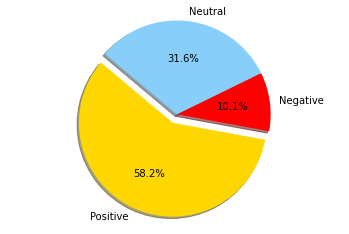



Positive tweets:
RT @UniversityStar: BREAKING: 21 year-old Harper Garlitos was last seen in #SMTX on May 10, 2021, and was driving his silver 2003 Toyota Tu…
RT @KumatServices: Another sweet weekend deal you don't want to miss.

Foreign used 2005 Toyota RAV4 

Location: Ojodu Berger, Lagos

Price…
RT @enaautomobileng: 【FOREIGN USED - TOKUNBO】
2012 Toyota Corolla
In silver on grey interior now available 

【PRICE；3.7M NET】…
@Toyota_CAMRYx3 RIGHT! Cause mfs just be wanting to smoke &amp; leave 🙄
【FOREIGN USED - TOKUNBO】
2012 Toyota Corolla
In silver on grey interior now available 

【PRICE；3.7M NET】… https://t.co/HpmLTO3pzI
Omo, the all new Toyota Starlet 2020 model is all I want right now 😩😩😩
@ACLU Gerry's Corner Podcast
Episode 9: *Built like Toyota*

Toyota has 3 primary principles to make their cars, in… https://t.co/K6LbKKIadd
Toyota Camry 2004 Foreign Used Accident Free EUC Location: Ajah Price: ₦1.950
📞/WhatsApp 09012505322… https://t.co/WdCJBGk37a
Another sweet weekend deal you d

In [12]:
#Classify the sentiments for hashtag Toyota
raw_tweets = api.search(q = 'Toyota', lang='en',count = 400)
classified_tweets=get_sentiments(raw_tweets)
summary(classified_tweets,10)

Positive tweets percentage: 41.55844155844156 %
Negative tweets percentage: 18.181818181818183 %
Neutral tweets percentage: 40.25974025974026 %


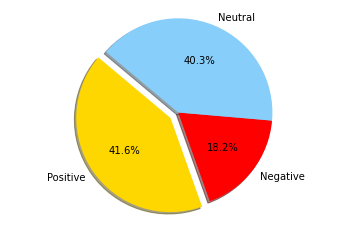



Positive tweets:
RT @Devineni_Hari: It's A Bit Blurred But Still It's Cute 
#Prabhas || #RadheShyam 😍
Pic Credits - @honda_hiyuu https://t.co/jMRKLrPmZ5
RT @Abuja_AutoHaven: Very Clean foreign used Honda Accord V6, push to start, 2013 model with original duty, going for 5.9M, Location: Abuja…
RT @Jawanza: Today’s already been a good day and one more direct action to go! 
—
Today we rallied to pass the #HONDA bill in Albany in our…
RT @HERMusicx: ICYMI: Here’s my @HondaStage performance of #Damage: https://t.co/eQYUdZ8KO4. Are you ready for the remix? Coming soon… @Hon…
Someone says “what kind of car is that?!”

Sir. It’s a civic. A Honda Civic.
RT @cars_pixels: Out &amp; about

Here are live pictures of the all-new Honda Civic sedan.

📸 Kbb_com https://t.co/XGFY8PzLhh
2022 Honda Civic - LIVE! https://t.co/itdZiE7uXt via @YouTube
@keegzzz Been driving a Honda fit since 2015, excellent car
Placing amazing people at great jobs. Click here to learn more about our latest job opening in #S

In [13]:
#Classify the sentiments for hashtag Honda
raw_tweets = api.search(q = 'Honda', lang='en',count = 400)
classified_tweets=get_sentiments(raw_tweets)
summary(classified_tweets,10)

### Toyota vs Honda
For the hastags Toyota and Honda, Toyota garnered 58.2% positive tweets, 31.6% neutral tweets, and 10.1% negative tweets according to the pie chart generated. Based on the summary of the tweets for Toyota, it can be seen that most of the positive tweets are about promotions of the car such as people selling their used Toyotas. As for the negative tweets, it can be seen that most of them are not really negative but contain keywords that might be interpreted as negative such as sorry, crazy, and shit.

As for Honda, it garnered 40.3% positive tweets, 41.6% neutral tweets, and 18.2% negative tweets according to the pie chart generated. Based on the summary of the collected tweets, the postive and negative tweets were quite accurate to what the tweets actually were. The positive tweets contained praise for the car model by users and as for the negative tweets, they contained a lot of distain for the car model even going as far as bashing the brand and the consumers that uses them. These negative tweets also contained a lot of complaints by users that do not like the brand or about their job having to deal with customers that use the brand.

### Part 2: Vectorise text data to TF-IDF

TF-IDF = Term Frequency-Inverse Document Frequency

Step 1: Create a paragraph of input text

In [7]:
# Load libraries
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
# Create text extracted from same news article different paragraph
text_data = np.array(['Donald Trump hopes for ‘world peace’ as he announces he will\
                        meet North Korea’s Kim Jong-un in Singapore summit in June',
                      'The summit, which has been in the works since Trump accepted\
                      Kim invitation to meet in June, will be the first ever \
                      meeting between a sitting US president and North Korean leader',
                      'The US president Donald Trump said he hoped to reach a deal with\
                      im on North Korea’s denuclearisation that could exceed the peoples\
                      expectations'])

Step 2: Create the feature matrix

In [8]:
from sklearn.feature_extraction import text 

#remove some non important words in addition to built in stop words
my_additional_stop_words={'as','in','for','he','very'}
my_stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

# Create the tf-idf feature matrix
tfidf = TfidfVectorizer(stop_words=set(my_stop_words))
feature_matrix = tfidf.fit_transform(text_data)

# Show tf-idf feature matrix
feature_matrix.toarray()

array([[0.        , 0.31360367, 0.        , 0.        , 0.23850367,
        0.        , 0.        , 0.        , 0.31360367, 0.        ,
        0.        , 0.31360367, 0.23850367, 0.23850367, 0.23850367,
        0.        , 0.        , 0.23850367, 0.        , 0.18521938,
        0.31360367, 0.        , 0.        , 0.        , 0.        ,
        0.31360367, 0.        , 0.23850367, 0.18521938, 0.        ,
        0.31360367],
       [0.30729759, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.30729759, 0.        , 0.23370774, 0.23370774, 0.        ,
        0.30729759, 0.30729759, 0.23370774, 0.30729759, 0.18149491,
        0.        , 0.        , 0.23370774, 0.        , 0.        ,
        0.        , 0.30729759, 0.23370774, 0.18149491, 0.30729759,
        0.        ],
       [0.        , 0.        , 0.29574859, 0.29574859, 0.22492443,
        0.29574859, 0.29574859, 0.29574859, 0.        , 0.29574859,
      

Step 3: Get the feature names

In [9]:
# Show tf-idf feature matrix
tfidf.get_feature_names()

['accepted',
 'announces',
 'deal',
 'denuclearisation',
 'donald',
 'exceed',
 'expectations',
 'hoped',
 'hopes',
 'im',
 'invitation',
 'jong',
 'june',
 'kim',
 'korea',
 'korean',
 'leader',
 'meet',
 'meeting',
 'north',
 'peace',
 'peoples',
 'president',
 'reach',
 'said',
 'singapore',
 'sitting',
 'summit',
 'trump',
 'works',
 'world']

Step 4: Create a dataframe of TF-IDF terms

In [10]:
# Create data frame
df=pd.DataFrame(feature_matrix.toarray(), columns=tfidf.get_feature_names())
df.loc[0]

accepted            0.000000
announces           0.313604
deal                0.000000
denuclearisation    0.000000
donald              0.238504
exceed              0.000000
expectations        0.000000
hoped               0.000000
hopes               0.313604
im                  0.000000
invitation          0.000000
jong                0.313604
june                0.238504
kim                 0.238504
korea               0.238504
korean              0.000000
leader              0.000000
meet                0.238504
meeting             0.000000
north               0.185219
peace               0.313604
peoples             0.000000
president           0.000000
reach               0.000000
said                0.000000
singapore           0.313604
sitting             0.000000
summit              0.238504
trump               0.185219
works               0.000000
world               0.313604
Name: 0, dtype: float64

Step 5: Show the list of TF-IDF terms

In [11]:
df.loc[1]

accepted            0.307298
announces           0.000000
deal                0.000000
denuclearisation    0.000000
donald              0.000000
exceed              0.000000
expectations        0.000000
hoped               0.000000
hopes               0.000000
im                  0.000000
invitation          0.307298
jong                0.000000
june                0.233708
kim                 0.233708
korea               0.000000
korean              0.307298
leader              0.307298
meet                0.233708
meeting             0.307298
north               0.181495
peace               0.000000
peoples             0.000000
president           0.233708
reach               0.000000
said                0.000000
singapore           0.000000
sitting             0.307298
summit              0.233708
trump               0.181495
works               0.307298
world               0.000000
Name: 1, dtype: float64

###  <font color='red'> Task 11 (Question 2): (1%)

What are the most important words in the paragrph? 
Comment on using TF-IDF terms to classify documents. 

The most important words in the paragraph has a weight of 0.307298 and the words are:
accepted,
invitation,
korean,
leader,
meeting,
sitting,
works

Using TF-IDF is a technique used to find the meaning of sentences consisting of words and it cancels out the incapabilities of the Bag Of Words technique which is  good for text classification or for helping machine learning read words in numbers